In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Data Import

In [2]:
df = pd.read_csv(r"C:\Users\mohds\Downloads\CodeSoft\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- As the description suggest all the features went through PCA.
- The given dataset is scaled already as to performing PCA it is required.

##### Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Duplicates Removal

In [4]:
df.shape

(284807, 31)

##### Checking missing value

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No missing (or NULL) value is present.

In [6]:
df['Amount'].describe().T

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

- The transaction amount is relatively small, as the mean of all the transaction is made 88 only.

In [7]:
print(f"No Fraud {round(((df.Class.value_counts(normalize=True)[0])*100), 2)}% of Data")
print(f"Fraud {round(((df.Class.value_counts(normalize=True)[1])*100), 2)}% of Data")

No Fraud 99.83% of Data
Fraud 0.17% of Data


- The data is highly imbalanced were Non-Fraund (99.83%), while Fraud (0.17%).

##### Outlier Treatment

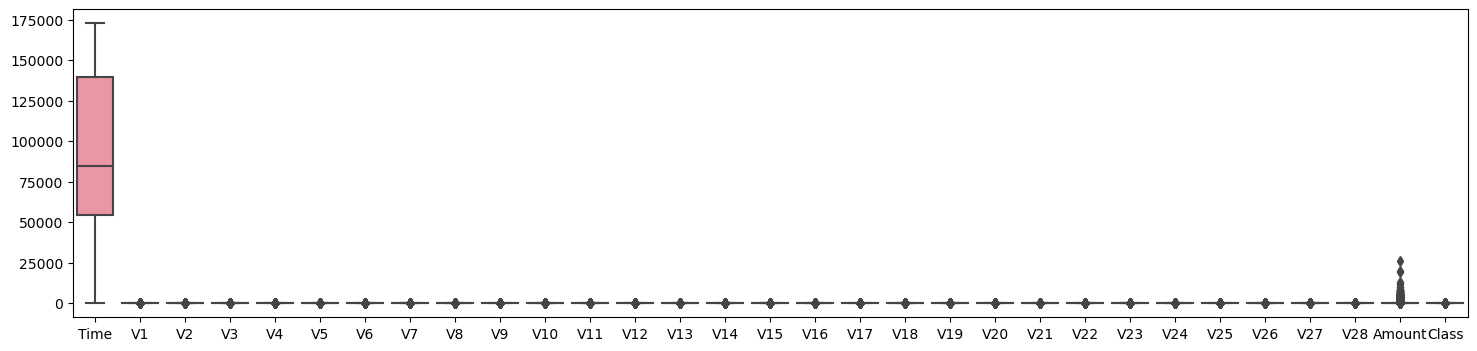

In [8]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df)
plt.show()

In [9]:
for i in df:
    if df[i].dtypes == "float64":
        p02 = df[i].quantile(0.02)
        p98 = df[i].quantile(0.98)
        df[i] = np.where(df[i] < p02, p02, 
                         np.where(df[i] > p98, p98, df[i]))

In [10]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

df['Time'] = rc.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rc.fit_transform(df['Amount'].values.reshape(-1,1))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

In [12]:
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [13]:
fraud.Class.value_counts()

Class
1    492
Name: count, dtype: int64

* Due to the substantial imbalance in the dataset, we will address iy by ensuring an equal number of non-fraudulent instance as there are fraudulent

In [14]:
non_fraud_bal = non_fraud.sample(n=492)

In [15]:
df_balance = pd.concat([non_fraud_bal, fraud], axis=0)
df_balance.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96413,-0.222442,-0.656038,0.686976,2.316770,0.920356,-0.287440,0.678118,-0.060009,0.416786,0.364373,...,-0.018971,0.238072,-0.163296,-0.303839,-0.031800,-0.258020,0.420797,0.181604,-0.049605,0
14631,-0.691326,-0.453763,0.557826,1.594975,0.586771,-0.976497,0.152380,-0.099651,-0.834966,-1.501741,...,0.328269,-0.925018,0.311592,0.319706,-0.558644,-0.513093,0.097945,0.012196,0.803465,0
144958,0.021464,2.061042,0.264360,-1.756224,0.531538,0.243162,-1.497821,0.307351,-0.416771,0.528190,...,0.190685,0.748878,-0.034714,-0.085443,0.275626,-0.100994,0.001522,-0.028561,-0.258506,0
175414,0.442110,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,-0.282401,0
24412,-0.604695,-0.958639,1.356101,-1.467516,-1.102300,2.209994,3.016978,-0.162729,1.521794,-1.137753,...,0.196849,0.134348,-0.139062,1.016465,0.005797,0.368874,-0.296004,0.007122,-0.148955,0


In [16]:
print(f"No Fraud {round(((df_balance.Class.value_counts(normalize=True)[0])*100), 2)}% of Data")
print(f"Fraud {round(((df_balance.Class.value_counts(normalize=True)[1])*100), 2)}% of Data")

No Fraud 50.0% of Data
Fraud 50.0% of Data


- Now, the data is Balanced.

##### Data Partition

In [17]:
X = df_balance.drop('Class', axis=1)
y = df_balance.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

##### Logistic Regression

In [19]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)

LogisticRegression()

In [20]:
train_LR = pd.concat([y_train, X_train], axis=1)
train_LR.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258403,1,0.868737,-4.757888,-3.419452,-3.192457,3.720890,2.878051,-1.777548,-2.060577,0.876531,...,1.628012,1.073130,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-0.595180,3.828687
142557,1,0.001140,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,4.643750
160671,0,0.338914,2.068787,-0.009888,-1.078200,0.396039,-0.065030,-1.166286,0.218718,-0.361428,...,-0.189768,-0.287673,-0.665859,0.326944,-0.009563,-0.271624,0.198044,-0.067124,-0.059563,-0.294977
213116,1,0.639399,-3.975939,-1.244939,-3.192457,3.720890,2.878051,-1.777548,-2.060577,1.007042,...,1.628012,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.627477,0.372774,-0.191434
9509,1,-0.828722,-4.710529,2.758192,-3.192457,3.720890,-2.280545,-1.777548,-2.060577,1.521794,...,1.434240,1.073130,0.223785,0.554408,-1.204042,-0.450685,0.641836,0.627477,0.372774,-0.293440


In [21]:
train_LR['Prob'] = Model_LR.predict_proba(X_train)[:,1]
train_LR['Prediction'] = np.where(train_LR['Prob'] > 0.7, 1, 0)
train_LR.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Prob,Prediction
258403,1,0.868737,-4.757888,-3.419452,-3.192457,3.720890,2.878051,-1.777548,-2.060577,0.876531,...,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-0.595180,3.828687,0.999929,1
142557,1,0.001140,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,...,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,4.643750,0.218969,0
160671,0,0.338914,2.068787,-0.009888,-1.078200,0.396039,-0.065030,-1.166286,0.218718,-0.361428,...,-0.665859,0.326944,-0.009563,-0.271624,0.198044,-0.067124,-0.059563,-0.294977,0.014716,0
213116,1,0.639399,-3.975939,-1.244939,-3.192457,3.720890,2.878051,-1.777548,-2.060577,1.007042,...,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.627477,0.372774,-0.191434,0.999809,1
9509,1,-0.828722,-4.710529,2.758192,-3.192457,3.720890,-2.280545,-1.777548,-2.060577,1.521794,...,0.223785,0.554408,-1.204042,-0.450685,0.641836,0.627477,0.372774,-0.293440,0.999591,1


##### Model Evaluation on Train

In [22]:
print(classification_report(train_LR.Prediction, train_LR.Class))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       422
           1       0.92      0.99      0.95       365

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



##### On Test

In [23]:
test_LR = pd.concat([y_test, X_test], axis=1)
test_LR.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42756,1,-0.510568,-4.757888,2.758192,-3.192457,3.720890,-2.280545,-1.777548,-2.060577,1.521794,...,-0.046170,1.073130,0.206809,-0.763501,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.296793
76059,0,-0.332628,1.155911,0.084122,-0.076377,1.020133,0.496676,0.826220,0.009914,0.168824,...,-0.057572,-0.105568,-0.128207,-0.247596,-1.125203,0.796942,-0.261699,0.033308,-0.000625,0.159296
111690,1,-0.145267,-4.198735,0.194121,-3.192457,3.720890,-1.875486,-1.777548,-2.060577,1.521794,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,0.627477,-0.131525,3.030811
58614,0,-0.425534,1.205595,0.023441,0.958080,1.139085,-0.472769,0.302220,-0.489890,0.073206,...,-0.022321,-0.101287,-0.029245,-0.126246,-0.424370,0.566215,-0.361072,0.078711,0.032943,-0.125900
100819,0,-0.200390,1.349857,-1.153778,1.394244,-0.287061,-1.839165,0.394527,-1.667732,0.339432,...,-0.049385,0.086317,0.545535,-0.138514,-0.110274,0.502557,-0.007588,0.076099,0.018509,-0.266890


In [24]:
test_LR['Prob'] = Model_LR.predict_proba(X_test)[:,1]
test_LR['Prediction'] = np.where(test_LR['Prob'] > 0.7, 1, 0)
test_LR.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Prob,Prediction
42756,1,-0.510568,-4.757888,2.758192,-3.192457,3.720890,-2.280545,-1.777548,-2.060577,1.521794,...,0.206809,-0.763501,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.296793,0.998977,1
76059,0,-0.332628,1.155911,0.084122,-0.076377,1.020133,0.496676,0.826220,0.009914,0.168824,...,-0.128207,-0.247596,-1.125203,0.796942,-0.261699,0.033308,-0.000625,0.159296,0.028723,0
111690,1,-0.145267,-4.198735,0.194121,-3.192457,3.720890,-1.875486,-1.777548,-2.060577,1.521794,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,0.627477,-0.131525,3.030811,0.999797,1
58614,0,-0.425534,1.205595,0.023441,0.958080,1.139085,-0.472769,0.302220,-0.489890,0.073206,...,-0.029245,-0.126246,-0.424370,0.566215,-0.361072,0.078711,0.032943,-0.125900,0.034159,0
100819,0,-0.200390,1.349857,-1.153778,1.394244,-0.287061,-1.839165,0.394527,-1.667732,0.339432,...,0.545535,-0.138514,-0.110274,0.502557,-0.007588,0.076099,0.018509,-0.266890,0.023484,0


##### Model Evaluation on Test

In [25]:
print(classification_report(test_LR.Prediction, test_LR.Class))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       109
           1       0.89      0.99      0.94        88

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

